In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [108]:
ds=pd.read_csv("train.csv")
ds

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [5]:
ds.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0.5, 1.0, 'Null values in Dataset')

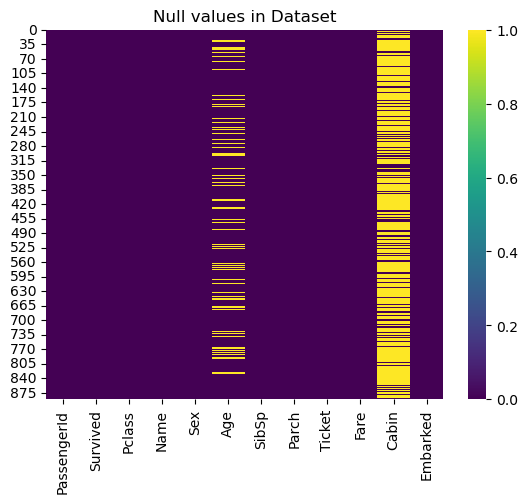

In [17]:
sns.heatmap(ds.isnull(),cmap='viridis').set_title("Null values in Dataset")

#### Missing Values in column Age are minimal, which are replacable with reasonable values

In [26]:
ds["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

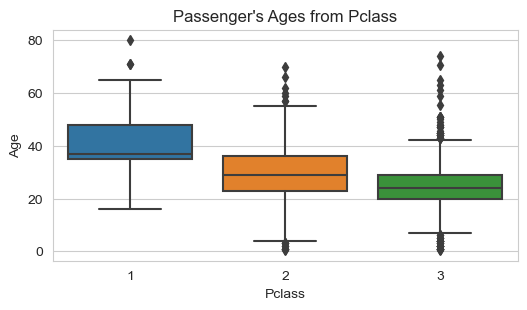

In [106]:
plt.figure(figsize=(6,3))
sns.boxplot(data=ds,x="Pclass",y="Age").set_title("Passenger's Ages from Pclass")
sns.set_style("whitegrid")

### Conlusion: Pclass 1 has people majorly of age 37. Pclass 2 has people majorly of age 29. Pclass 3 has people majorly of age 24

In [40]:
def missed_values(row) :
    if(pd.isnull(row["Age"])):
        if(row["Pclass"]==1):
            return 37
        elif(row["Pclass"]==2):
            return 29
        elif(row["Pclass"]==3):
            return 24
            
    else:
        return row["Age"]

In [41]:
ds["Age"]=ds.apply(missed_values,axis=1)

#### Now we've replaced Null values in column Age 

<Axes: >

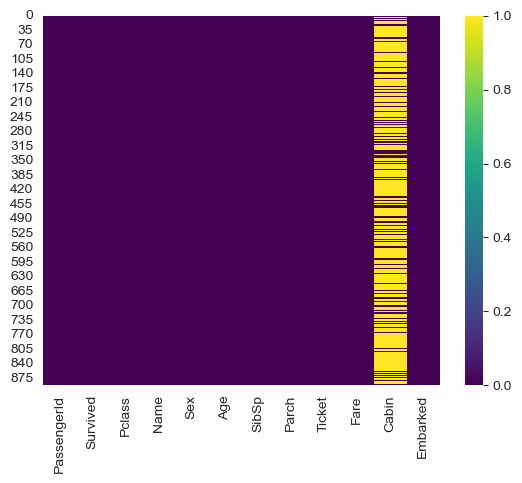

In [42]:
sns.heatmap(ds.isnull(),cmap='viridis')

#### Removed Outliers from Fare

In [44]:
Q1 = ds["Fare"].quantile(0.25)
Q3 = ds["Fare"].quantile(0.75)
IQR = Q3 - Q1
outlier_step = IQR * 1.5
ds=ds[(ds["Fare"] > Q1 - outlier_step) & (ds["Fare"] < Q3 + outlier_step)]

### Data Analysis

In [45]:
ds

PassengerId  Survived  Pclass  \
0              1         0       3   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                         Braund, Mr. Owen Harris    male  22.0      1      0   
2                          Heikkinen, Miss. Laina  female  26.0      0      0   
3    Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0   
4                        Allen, Mr. William Henry    male  35.0      0      0   
5                                Moran, Mr. James    male  24.0      0      0   
..                                            ...     ...   ...    ...    ...   
886                         Montvila, Rev. Juozas    male  27.0      0      0   
887                  Graham, Miss. Margaret Edith  female  19.0      0      0   
888      Johnston, Miss. Catherine Helen "Carrie"  female  24.0      1      2   
889                         Behr, Mr. Karl Howell    male  26.0      0      0   
890                           Dooley, Mr. Patrick    male  32.0      0      0   

               Ticket     Fare Cabin Embarked  
0           A/5 21171   7.2500   NaN        S  
2    STON/O2. 3101282   7.9250   NaN        S  
3              113803  53.1000  C123        S  
4              373450   8.0500   NaN        S  
5              330877   8.4583   NaN        Q  
..                ...      ...   ...      ...  
886            211536  13.0000   NaN        S  
887            112053  30.0000   B42        S  
888        W./C. 6607  23.4500   NaN        S  
889            111369  30.0000  C148        C  
890            370376   7.7500   NaN        Q  

[750 rows x 12 columns]

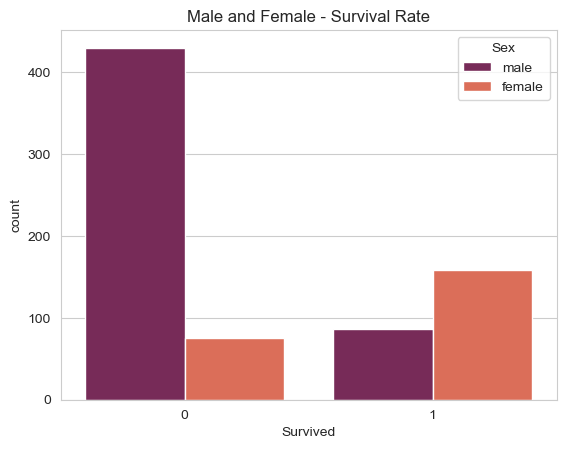

In [51]:
sns.countplot(data=ds,x="Survived",hue="Sex",palette="rocket").set_title("Male and Female - Survival Rate");

### Conclusion: According to the graph , Female passengers survived more than Male passengers

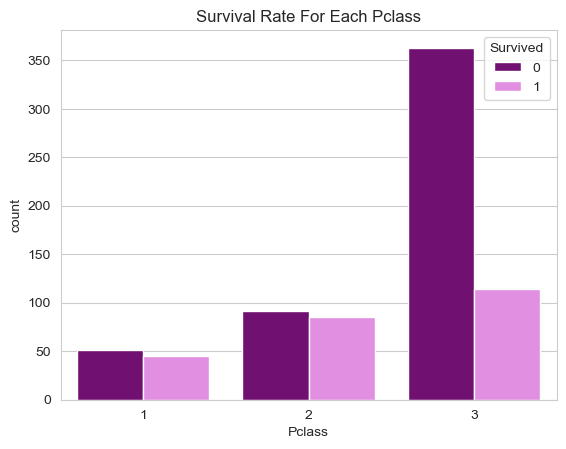

In [80]:
sns.countplot(data=ds,x="Pclass",hue="Survived",palette=["purple","violet"]).set_title("Survival Rate of Each Pclass");

### Conclusion: Among all the Pclass, people from the Pclass 3 survived the most and  people from the Pclass 1 survived the least

Text(0.5, 1.0, 'Survival Rate of Age Group')

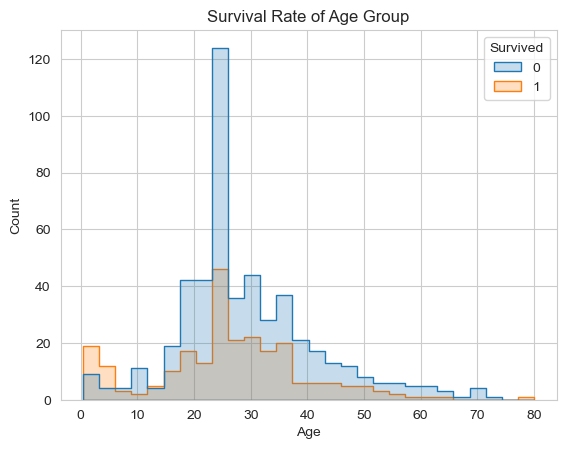

In [95]:
sns.set_style('whitegrid')
sns.histplot(data=ds ,x="Age",hue="Survived",element="step").set_title("Survival Rate of Age Group")

### Conclusion: According to Histograph, Passengers from Age group 0-10 survived the most.The Survival rate of Passengers from Age group 20-40 is the least. 